In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


<b>Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).</b>

In [2]:
df[df['signs_of_mental_illness'] == True].pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc=len)

signs_of_mental_illness,True
race,
A,24
B,184
H,157
N,14
O,11
W,713


<b>Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.</b>

In [3]:
df_race_signs_of_mental_illness = df.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc=len)
df_race_signs_of_mental_illness

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [4]:
def calculate_total(row):

    total = row[False] + row[True]
    return total

In [5]:
df_race_signs_of_mental_illness['total_signs_of_mental_illness'] = df_race_signs_of_mental_illness.apply(lambda row: calculate_total(row), axis=1)
df_race_signs_of_mental_illness

signs_of_mental_illness,False,True,total_signs_of_mental_illness
race,,,
A,69,24,93
B,1114,184,1298
H,745,157,902
N,64,14,78
O,37,11,48
W,1763,713,2476


In [6]:
def calculate_proc_signs_of_mental_illness(row):
    proc = row[True]/row['total_signs_of_mental_illness'] * 100
    return round(proc,2)

In [7]:
df_race_signs_of_mental_illness['proc_signs_of_mental_illness (%)'] = df_race_signs_of_mental_illness.apply(lambda row: calculate_proc_signs_of_mental_illness(row), axis=1)
df_race_signs_of_mental_illness

signs_of_mental_illness,False,True,total_signs_of_mental_illness,proc_signs_of_mental_illness (%)
race,,,,
A,69,24,93,25.81
B,1114,184,1298,14.18
H,745,157,902,17.41
N,64,14,78,17.95
O,37,11,48,22.92
W,1763,713,2476,28.80


Race W charakteryzuje się najwyższym odsetkiem znamion choroby psychicznej podczas interwencji.

<b>Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli</b>

In [8]:
df['weekday'] = pd.to_datetime(df['date']).dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [9]:
days_of_the_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=days_of_the_week, ordered=True)
df['weekday'] = df['weekday'].astype(cat_type)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


<Axes: xlabel='weekday'>

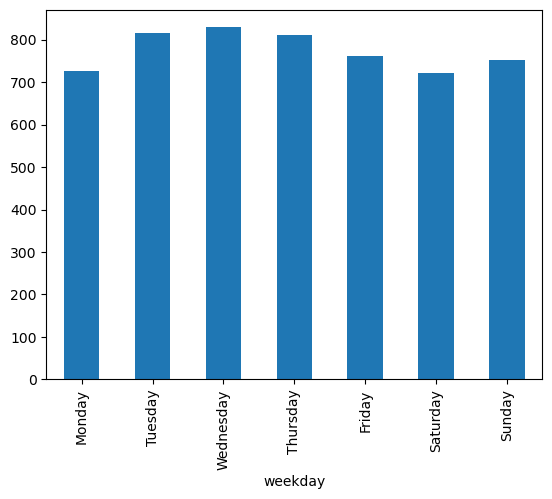

In [10]:
df_weekday_shootings = df.pivot_table(values='id', columns='weekday', aggfunc=len)
df_weekday_shootings.iloc[0].plot.bar()


In [11]:
df_weekday_shootings

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
id,726,816,829,810,761,721,753


<b>Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.</b>

In [12]:
list_of_us_population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')
df_list_of_us_population = list_of_us_population[0]
list_of_us_abbr = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', skiprows=9)
df_list_of_us_abbr = list_of_us_abbr[0]

In [13]:
df_list_of_us_population

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,29145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [14]:
df_list_of_us_abbr = df_list_of_us_abbr.head(53)

In [15]:
df_list_of_us_abbr.drop([0,1], inplace=True)
df_list_of_us_abbr

/var/folders/k4/qcbb_13n7x5d_61jd_xpx30r0000gn/T/ipykernel_2420/750887044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list_of_us_abbr.drop([0,1], inplace=True)


,Name and status of region,Name and status of region.1,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[1]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN
5,Arkansas,State,US-AR,AR,5.0,AR,AR,Ark.,Ark.,NaN
6,California,State,US-CA,CA,6.0,CA,CF,Calif.,Calif.,Cal.
7,Colorado,State,US-CO,CO,8.0,CO,CL,Colo.,Colo.,NaN
8,Connecticut,State,US-CT,CT,9.0,CT,CT,Conn.,Conn.,NaN
9,Delaware,State,US-DE,DE,10.0,DE,DL,Del.,Del.,NaN
10,District of Columbia,Federal district,US-DC,DC,11.0,DC,DC,D.C.,D.C.,Dis. Col.[2]
11,Florida,State,US-FL,FL,12.0,FL,FL,Fla.,Fla.,NaN


In [16]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [17]:
df_list_of_us_abbr.rename(columns={'USPS': 'state'}, inplace=True)
df_list_of_us_abbr

/var/folders/k4/qcbb_13n7x5d_61jd_xpx30r0000gn/T/ipykernel_2420/892144643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list_of_us_abbr.rename(columns={'USPS': 'state'}, inplace=True)


,Name and status of region,Name and status of region.1,ISO,ANSI,ANSI.1,state,USCG,GPO,AP,Other abbreviations
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[1]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN
5,Arkansas,State,US-AR,AR,5.0,AR,AR,Ark.,Ark.,NaN
6,California,State,US-CA,CA,6.0,CA,CF,Calif.,Calif.,Cal.
7,Colorado,State,US-CO,CO,8.0,CO,CL,Colo.,Colo.,NaN
8,Connecticut,State,US-CT,CT,9.0,CT,CT,Conn.,Conn.,NaN
9,Delaware,State,US-DE,DE,10.0,DE,DL,Del.,Del.,NaN
10,District of Columbia,Federal district,US-DC,DC,11.0,DC,DC,D.C.,D.C.,Dis. Col.[2]
11,Florida,State,US-FL,FL,12.0,FL,FL,Fla.,Fla.,NaN


In [18]:
df_merge_shootings = pd.merge(df, df_list_of_us_abbr, how='inner', on='state')

In [19]:
df_merge_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,weekday,Name and status of region,Name and status of region.1,ISO,ANSI,ANSI.1,USCG,GPO,AP,Other abbreviations
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,Friday,Washington,State,US-WA,WA,53.0,WN,Wash.,Wash.,Wn.[6]
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,...,Tuesday,Washington,State,US-WA,WA,53.0,WN,Wash.,Wash.,Wn.[6]
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,...,Thursday,Washington,State,US-WA,WA,53.0,WN,Wash.,Wash.,Wn.[6]
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,...,Tuesday,Washington,State,US-WA,WA,53.0,WN,Wash.,Wash.,Wn.[6]
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,...,Monday,Washington,State,US-WA,WA,53.0,WN,Wash.,Wash.,Wn.[6]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,...,Tuesday,Vermont,State,US-VT,VT,50.0,VT,Vt.,Vt.,Verm.[5]
5412,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,...,Thursday,Rhode Island,State,US-RI,RI,44.0,RI,R.I.,R.I.,R.I. & P.P.
5413,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,...,Monday,Rhode Island,State,US-RI,RI,44.0,RI,R.I.,R.I.,R.I. & P.P.
5414,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,...,Thursday,Rhode Island,State,US-RI,RI,44.0,RI,R.I.,R.I.,R.I. & P.P.


In [20]:
df_merge_shootings.drop(columns=['Name and status of region.1', 'ISO', 'ANSI', 'ANSI.1', 'USCG', 'GPO',
       'AP', 'Other abbreviations'], inplace=True)
df_merge_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,Name and status of region
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,Tuesday,Washington
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,Thursday,Washington
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,Tuesday,Washington
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,Monday,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,Tuesday,Vermont
5412,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,Thursday,Rhode Island
5413,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,Monday,Rhode Island
5414,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,Thursday,Rhode Island


In [21]:
df_list_of_us_population.rename(columns={'State':'Name and status of region'}, inplace=True)
df_list_of_us_population

,"Rank in states & territories, 2020","Rank in states & territories, 2010",Name and status of region,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,29145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [22]:
df_merge_shootings = pd.merge(df_merge_shootings, df_list_of_us_population, how='inner', on='Name and status of region')
df_merge_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,"Rank in states & territories, 2020","Rank in states & territories, 2010","Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,13,13,7705281,6724540,14.6%,+980741,10,642107,770528,2.30%
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,...,13,13,7705281,6724540,14.6%,+980741,10,642107,770528,2.30%
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,...,13,13,7705281,6724540,14.6%,+980741,10,642107,770528,2.30%
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,...,13,13,7705281,6724540,14.6%,+980741,10,642107,770528,2.30%
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,...,13,13,7705281,6724540,14.6%,+980741,10,642107,770528,2.30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,...,51,50,643077,625741,2.8%,+17336,1,214359,643077,0.19%
5412,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,...,44,44,1097379,1052567,4.3%,+44812,2,274345,548690,0.33%
5413,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,...,44,44,1097379,1052567,4.3%,+44812,2,274345,548690,0.33%
5414,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,...,44,44,1097379,1052567,4.3%,+44812,2,274345,548690,0.33%


In [23]:
df_merge_shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'weekday', 'Name and status of region',
       'Rank in states & territories, 2020',
       'Rank in states & territories, 2010',
       'Census population, April 1, 2020 [1][2]',
       'Census population, April 1, 2010 [1][2]',
       'Percent change, 2010–2020 [note 1]', 'Absolute change, 2010-2020',
       'Total seats in the U.S. House of Representatives, 2023–2033',
       'Census population per electoral vote [note 2]',
       'Census population per House seat',
       'Percent of the total U.S. population, 2020 [note 3]'],
      dtype='object')

In [24]:
df_merge_shootings.drop(columns=['Census population, April 1, 2010 [1][2]',
       'Percent change, 2010–2020 [note 1]', 'Absolute change, 2010-2020',
       'Total seats in the U.S. House of Representatives, 2023–2033',
       'Census population per electoral vote [note 2]',
       'Census population per House seat',
       'Percent of the total U.S. population, 2020 [note 3]'], inplace=True)
df_merge_shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'weekday', 'Name and status of region',
       'Rank in states & territories, 2020',
       'Rank in states & territories, 2010',
       'Census population, April 1, 2020 [1][2]'],
      dtype='object')

In [25]:
df_merge_shootings.drop(columns=['Rank in states & territories, 2020',
       'Rank in states & territories, 2010'], inplace=True)
df_merge_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,Name and status of region,"Census population, April 1, 2020 [1][2]"
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7705281
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,Tuesday,Washington,7705281
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,Thursday,Washington,7705281
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,Tuesday,Washington,7705281
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,Monday,Washington,7705281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,Tuesday,Vermont,643077
5412,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,Thursday,Rhode Island,1097379
5413,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,Monday,Rhode Island,1097379
5414,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,Thursday,Rhode Island,1097379


In [26]:
df_merge_shootings.head(20)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,weekday,Name and status of region,"Census population, April 1, 2020 [1][2]"
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7705281
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,Tuesday,Washington,7705281
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,Thursday,Washington,7705281
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,Tuesday,Washington,7705281
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,Monday,Washington,7705281
5,453,Stephen Cunningham,2015-05-10,shot,gun,47.0,M,W,Tacoma,WA,False,attack,Not fleeing,False,Sunday,Washington,7705281
6,530,Millard Tallant III,2015-05-26,shot,gun,62.0,M,W,Snohomish,WA,True,attack,Not fleeing,False,Tuesday,Washington,7705281
7,517,Gene Marshall,2015-06-07,shot,gun,58.0,M,W,Woodland,WA,True,attack,Not fleeing,False,Sunday,Washington,7705281
8,644,Samuel Smith,2015-07-17,shot,knife,27.0,M,W,Seattle,WA,False,other,Foot,False,Friday,Washington,7705281
9,708,Jason Galaviz,2015-08-05,shot,gun,40.0,M,W,Tacoma,WA,False,attack,Not fleeing,False,Wednesday,Washington,7705281


In [27]:
df_merge_shootings_per_thousand = df_merge_shootings.pivot_table(values='id', columns='Name and status of region', aggfunc=len).transpose()
df_merge_shootings_per_thousand = pd.merge(df_merge_shootings_per_thousand, df_merge_shootings, how='inner', on='Name and status of region')
df_merge_shootings_per_thousand.drop(columns=[ 'id_y', 'name', 'date',
       'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera',
       'weekday'], inplace=True)
df_merge_shootings_per_thousand.rename(columns={'id_x':'Amount shootings per state', 'Census population, April 1, 2020 [1][2]':'Population per state'}, inplace=True)
df_merge_shootings_per_thousand.drop_duplicates(inplace=True)
df_merge_shootings_per_thousand

,Name and status of region,Amount shootings per state,Population per state
0,Alabama,104,5024279
104,Alaska,39,733391
143,Arizona,254,7151502
397,Arkansas,83,3011524
480,California,799,39538223
1279,Colorado,195,5773714
1474,Connecticut,21,3605944
1495,Delaware,13,989948
1508,District of Columbia,13,689545
1521,Florida,350,21538187


In [28]:
def calculate_shootings_per_thousand_person(row):
    result = (row['Amount shootings per state']/row['Population per state'])*1000
    return result
df_merge_shootings_per_thousand['Amount shootings per thousand person in specific state'] = df_merge_shootings_per_thousand.apply(lambda row: calculate_shootings_per_thousand_person(row), axis=1)
df_merge_shootings_per_thousand.sort_values(by='Amount shootings per thousand person in specific state', ascending=False)

,Name and status of region,Amount shootings per state,Population per state,Amount shootings per thousand person in specific state
104,Alaska,39,733391,0.053178
3323,New Mexico,106,2117522,0.050059
3852,Oklahoma,164,3959353,0.041421
143,Arizona,254,7151502,0.035517
1279,Colorado,195,5773714,0.033774
3146,Nevada,96,3104614,0.030922
5257,West Virginia,54,1793716,0.030105
3091,Montana,31,1084225,0.028592
397,Arkansas,83,3011524,0.027561
5402,Wyoming,14,576851,0.024270
